# Notebook Imports

In [103]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.decomposition import PCA

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
redbook_data = sm.datasets.fair.load_pandas().data

In [32]:
redbook_data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [58]:
sm.datasets.fair.load_pandas().names

['rate_marriage',
 'age',
 'yrs_married',
 'children',
 'religious',
 'educ',
 'occupation',
 'occupation_husb',
 'affairs']

In [59]:
redbook_data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [33]:
redbook_data.shape

(6366, 9)

In [34]:
(redbook_data.affairs <= 0).sum()

4313

In [35]:
(redbook_data.affairs > 0).sum()

2053

In [36]:
# Checking null values
redbook_data.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

In [37]:
#add "affair" column: 1 represents having affairs, 0 represents not 
redbook_data['affair'] = (redbook_data.affairs > 0).astype(int)

In [38]:
redbook_data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [39]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
religious + educ + C(occupation) + C(occupation_husb)', redbook_data, return_type="dataframe")

X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2', 
                        'C(occupation)[T.3.0]':'occ_3', 
                        'C(occupation)[T.4.0]':'occ_4', 
                        'C(occupation)[T.5.0]':'occ_5', 
                        'C(occupation)[T.6.0]':'occ_6', 
                        'C(occupation_husb)[T.2.0]':'occ_husb_2', 
                        'C(occupation_husb)[T.3.0]':'occ_husb_3', 
                        'C(occupation_husb)[T.4.0]':'occ_husb_4', 
                        'C(occupation_husb)[T.5.0]':'occ_husb_5', 
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

y = np.ravel(y)

In [40]:
X

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [41]:
y.size

6366

In [42]:
# Checking for null Values
X.isnull().sum()

Intercept        0
occ_2            0
occ_3            0
occ_4            0
occ_5            0
occ_6            0
occ_husb_2       0
occ_husb_3       0
occ_husb_4       0
occ_husb_5       0
occ_husb_6       0
rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
dtype: int64

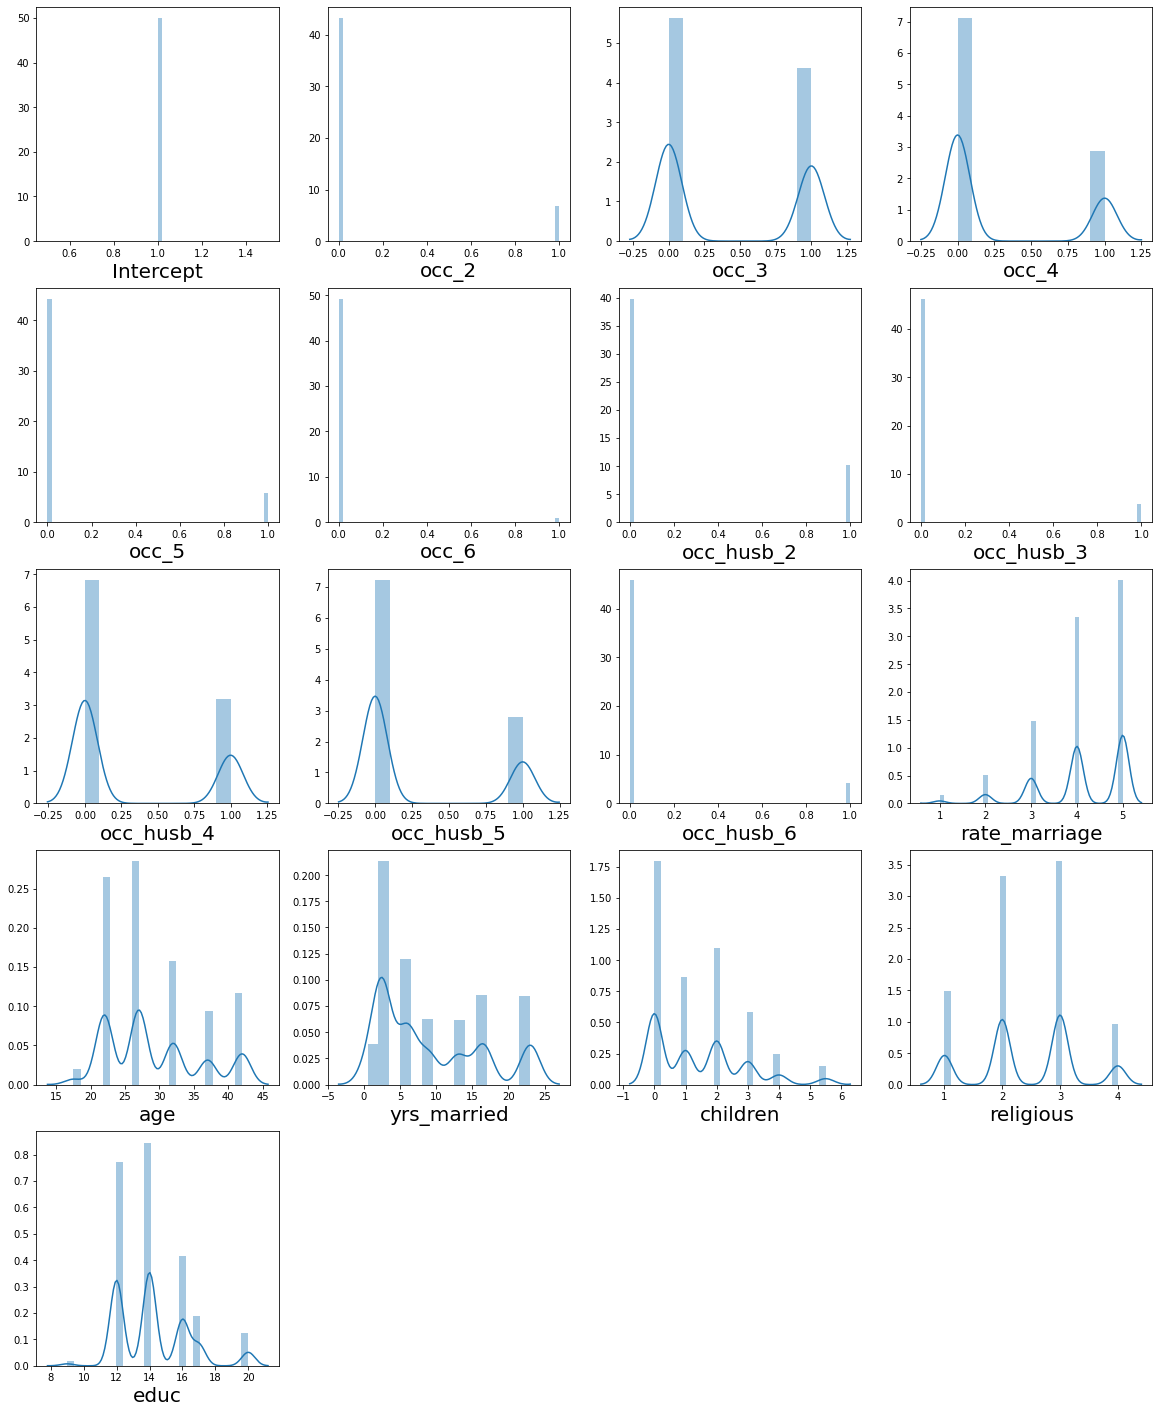

In [46]:
plt.figure(figsize=(20,25))
plotnumber = 1

for col in X.columns:
    if plotnumber<=17 :
        ax = plt.subplot(5, 4, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

- Most of the data is categorical in nature.
- While the numerical data seems within a considerable range
- Therefore we won't go for Scaling the data

# Bivaiate Analysis

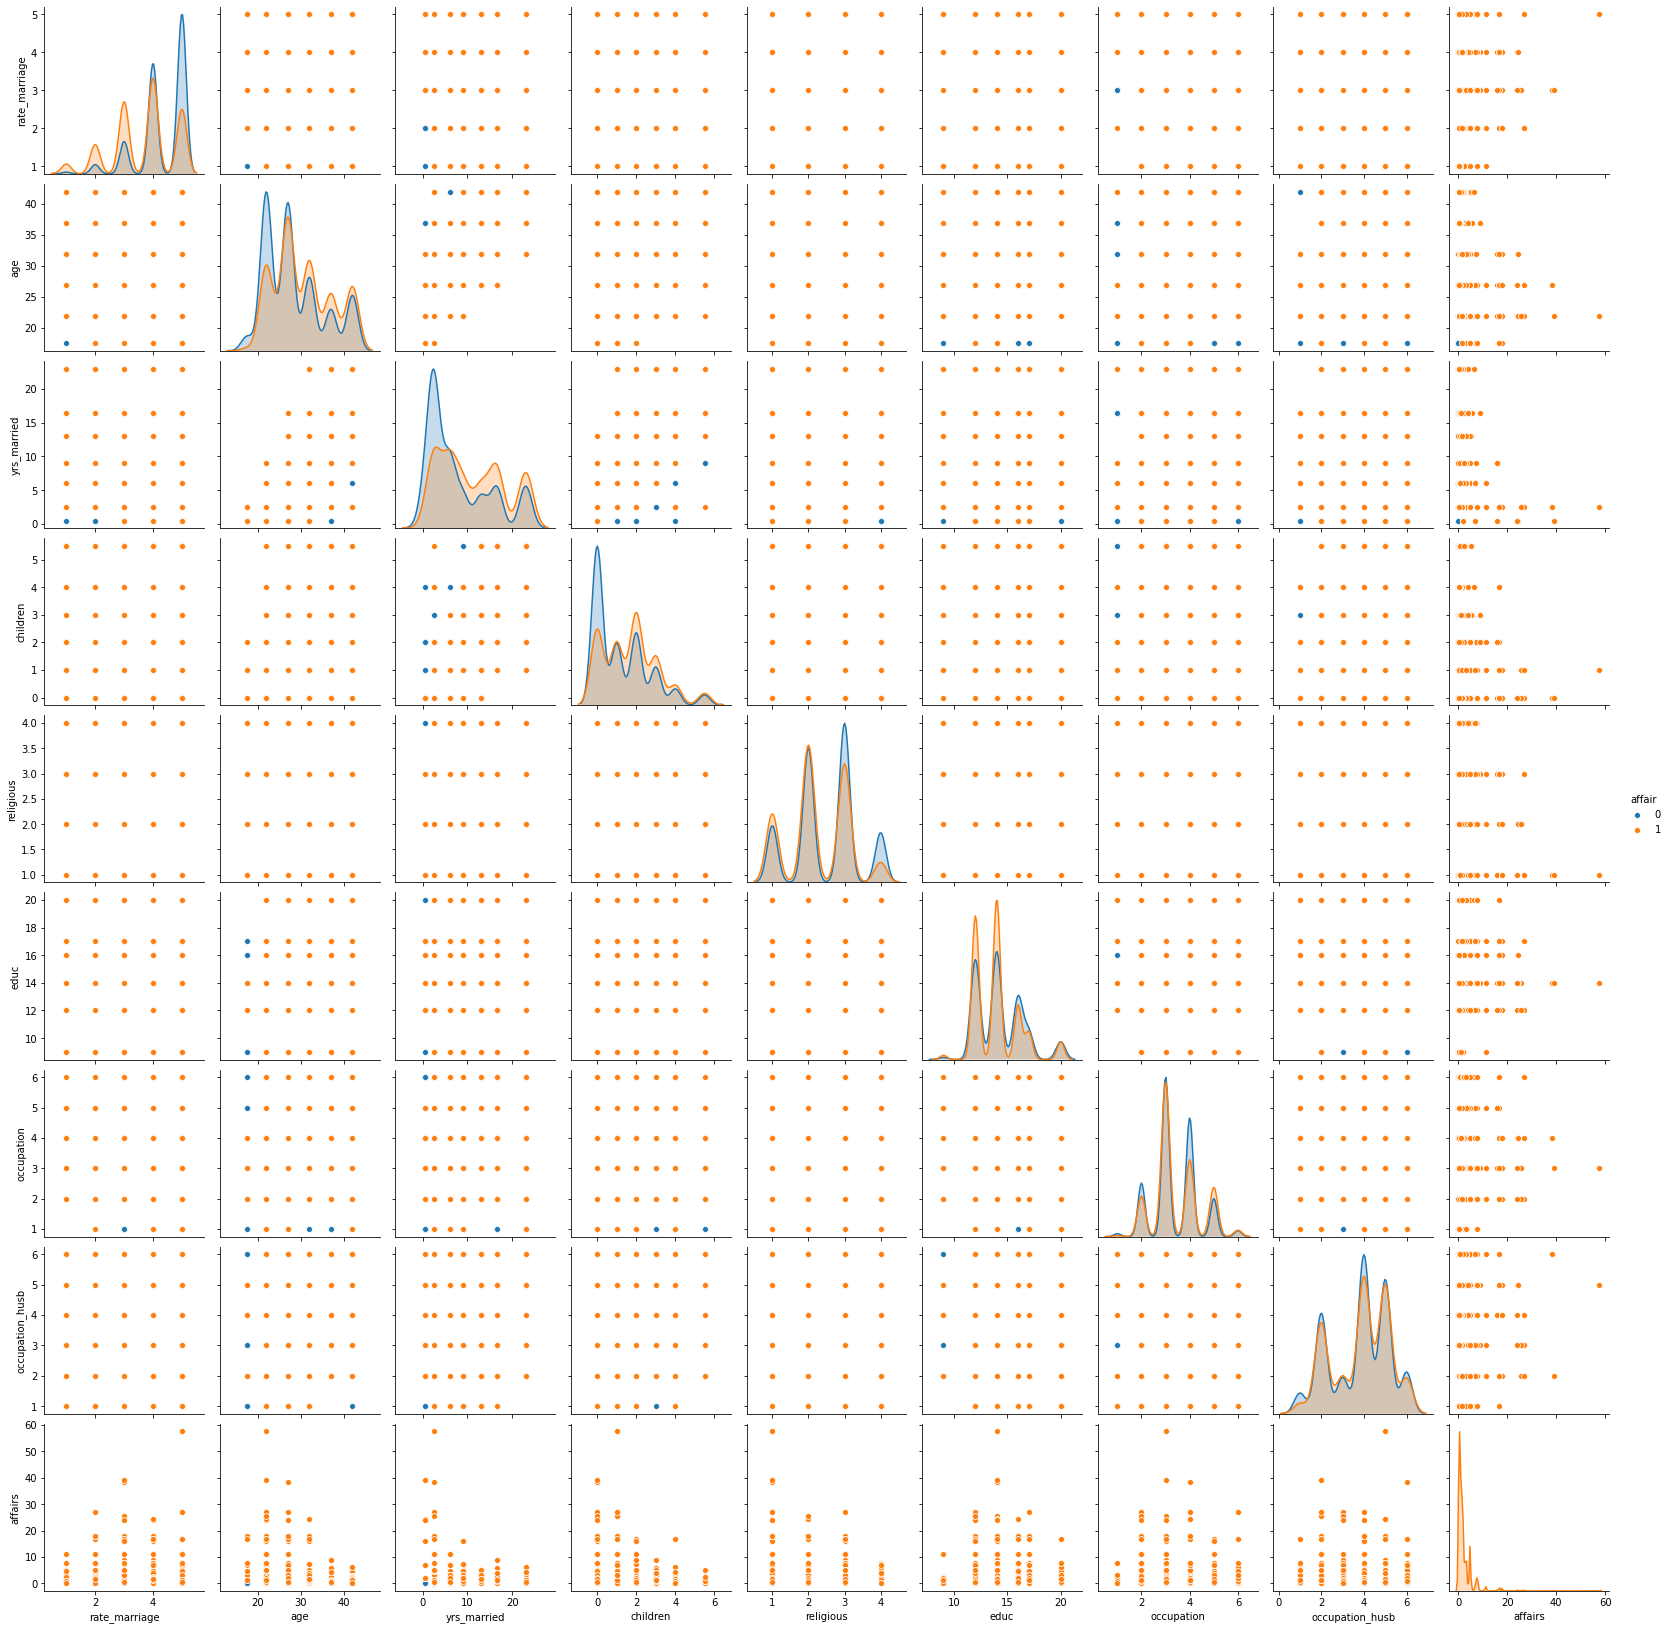

In [47]:
sns.pairplot(data=redbook_data, hue='affair')

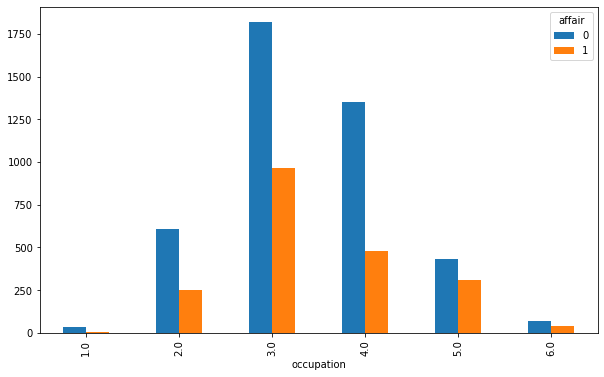

In [80]:
pd.crosstab(redbook_data.occupation, redbook_data.affair).plot(kind='bar', figsize=[10,6])
plt.show()

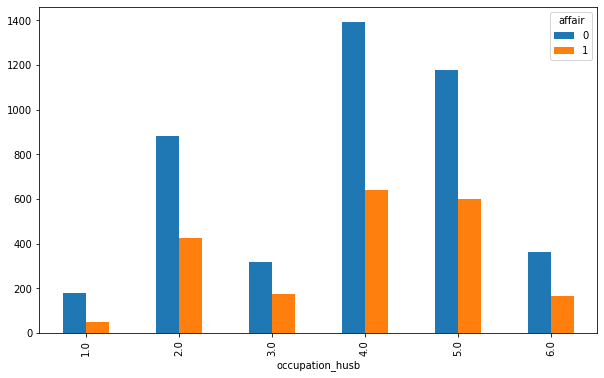

In [81]:
pd.crosstab(redbook_data.occupation_husb, redbook_data.affair).plot(kind='bar', figsize=[10,6])
plt.show()

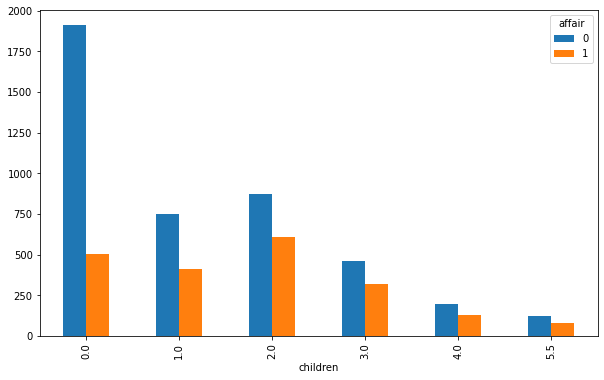

In [82]:
pd.crosstab(redbook_data.children, redbook_data.affair).plot(kind='bar', figsize=[10,6])
plt.show()

In [48]:
(y == 1).sum()

2053

In [49]:
(y == 0).sum()

4313

In [72]:
# Total perdentage of affairrs
y.mean()

0.3224945020420987

## VIF

In [64]:
X.shape

(6366, 17)

In [66]:
X.columns.size

17

In [67]:
X_arr = X.to_numpy()

In [68]:
type(X_arr)

numpy.ndarray

In [69]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_arr,i) for i in range(X.shape[1])]
vif["Features"] = X.columns

vif

,VIF,Features
0,298.668600,Intercept
1,19.340780,occ_2
2,39.335618,occ_3
3,32.931910,occ_4
4,17.057165,occ_5
5,3.697959,occ_6
6,5.566292,occ_husb_2
7,2.991070,occ_husb_3
8,6.930281,occ_husb_4
9,6.577077,occ_husb_5


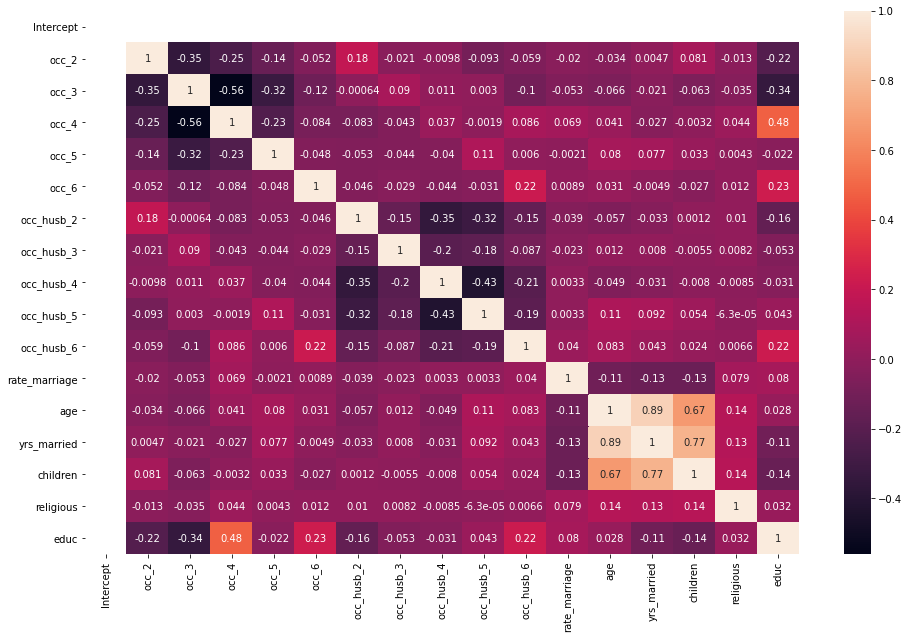

In [71]:
# Correlation
plt.figure(figsize=[16,10])
sns.heatmap(X.corr(), annot=True)
plt.show()

In [83]:
#

In [84]:
#

### Dropping 'Intercept' Column as it only has single value

In [142]:
X.drop('Intercept', axis=1, inplace=True)

In [143]:
X.shape

(6366, 16)

In [144]:
X.columns

Index(['occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2', 'occ_husb_3',
       'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage', 'age',
       'yrs_married', 'children', 'religious', 'educ'],
      dtype='object')

### Let's try Logistic Regression w/o handling multicolinearity - Base Model

In [183]:
# Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [184]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4774, 16)
(1592, 16)
(4774,)
(1592,)


In [185]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [186]:
# Predicting for Test Set
y_pred = log_reg.predict(X_test)

In [187]:
# Accuracy Score
acc = accuracy_score(y_test, y_pred)
acc

0.7141959798994975

In [188]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[963, 147],
       [308, 174]])

In [189]:
tp = conf_mat[0][0]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[1][1]

In [190]:
# Accuracy
(tp + tn) / conf_mat.sum()

0.7141959798994975

In [191]:
# Precision
precision = tp / (tp + fp)
precision

0.8675675675675676

In [192]:
# Recall
recall = tp / (tp + fn)
recall

0.7576711250983478

In [193]:
# F1 score
f1 = 2 * recall * precision / (recall + precision)
f1

0.8089038219235616

In [194]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.87      0.81      1110
         1.0       0.54      0.36      0.43       482

    accuracy                           0.71      1592
   macro avg       0.65      0.61      0.62      1592
weighted avg       0.69      0.71      0.70      1592



In [195]:
#

# PCA - handling multi-colinearity

In [196]:
# Standardizing data before PCA
sc = StandardScaler()
scaled_X = sc.fit_transform(X)

In [197]:
pca = PCA(n_components=scaled_X.shape[1], random_state=12)
pca_x = pca.fit_transform(scaled_X)

In [198]:
pca_x.shape

(6366, 16)

In [199]:
pca.components_.shape

(16, 16)

In [200]:
pca.explained_variance_

array([2.67002441, 2.11056483, 1.51270113, 1.44235495, 1.31820688,
       1.20242388, 1.06911422, 1.05978708, 0.99400911, 0.87832274,
       0.79844137, 0.49205612, 0.31419074, 0.08499819, 0.04612743,
       0.00919066])

In [201]:
pca.explained_variance_ratio_

array([0.16685031, 0.13188958, 0.09452897, 0.09013302, 0.08237499,
       0.07513969, 0.06680914, 0.06622629, 0.06211581, 0.05488655,
       0.04989475, 0.03074868, 0.01963384, 0.00531155, 0.00288251,
       0.00057433])

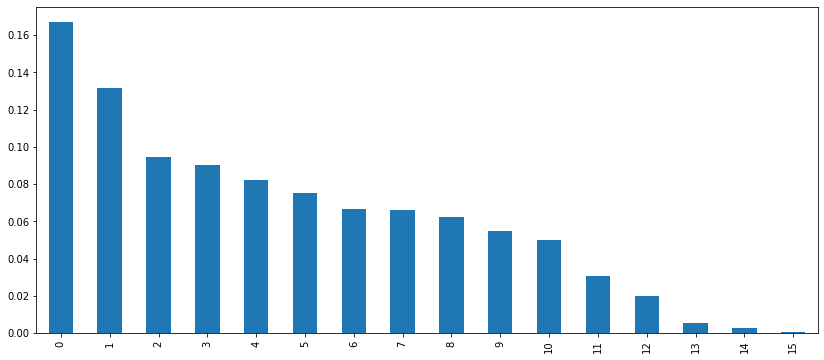

In [202]:
pd.Series(pca.explained_variance_ratio_).plot(kind='bar', figsize=[14, 6])

In [203]:
pca.explained_variance_ratio_[:11].sum()

0.9408490969297943

In [204]:
pca.explained_variance_ratio_[:2].sum()

0.29873989279544694

- Upto 11 Pricipal Components gives around 94% of information and top 11 components contribute evidently too
- Lets take that 11 components and apply Logistic Regression

In [205]:
pca_model = PCA(n_components=11, random_state=12)
pca_model.fit(scaled_X)

PCA(n_components=11, random_state=12)

In [206]:
pca_model_X = pca_model.transform(X)

In [207]:
pca_model_X.shape

(6366, 11)

In [208]:
# train test split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_model_X, y, test_size=0.25, random_state=12)

In [209]:
log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_pca, y_train_pca)

LogisticRegression()

In [210]:
y_pred_pca = log_reg_pca.predict(X_test_pca)

In [211]:
acc_pca = accuracy_score(y_test, y_pred_pca)
acc_pca

0.7198492462311558

In [212]:
conf_mat_pca = confusion_matrix(y_test_pca, y_pred_pca)
conf_mat_pca

array([[976, 134],
       [312, 170]])

In [213]:
tp = conf_mat_pca[0][0]
fp = conf_mat_pca[0][1]
fn = conf_mat_pca[1][0]
tn = conf_mat_pca[1][1]

In [214]:
# Accuracy
(tp + tn) / conf_mat.sum()

0.7198492462311558

In [215]:
# Precision
precision = tp / (tp + fp)
precision

0.8792792792792793

In [216]:
# Recall
recall = tp / (tp + fn)
recall

0.7577639751552795

In [217]:
# F1 score
f1 = 2 * recall * precision / (recall + precision)
f1

0.8140116763969976

In [219]:
# Classification Report
print(classification_report(y_test_pca, y_pred_pca))

              precision    recall  f1-score   support

         0.0       0.76      0.88      0.81      1110
         1.0       0.56      0.35      0.43       482

    accuracy                           0.72      1592
   macro avg       0.66      0.62      0.62      1592
weighted avg       0.70      0.72      0.70      1592



In [220]:
#

## There is very slight increase in accuracy, precision and recall after apllying PCA.
- One reason could be that the information is very evenly distributed between most of the principal components despite of showing evident multicolinearity.

## Lets Compare both models using AUC score and ROC Curves

In [221]:
# AUC Scores
y_pred_proba_base = log_reg.predict_proba(X_test)[:, 1]
auc_base = roc_auc_score(y_test, y_pred_proba_base)
print('AUC for Base Model =', auc_base)

y_pred_proba_pca = log_reg_pca.predict_proba(X_test_pca)[:, 1]
auc_pca = roc_auc_score(y_test, y_pred_proba_pca)
print('AUC for Model over PCA =', auc_pca)

AUC for Base Model = 0.7239234047325334
AUC for Model over PCA = 0.7272765504093306


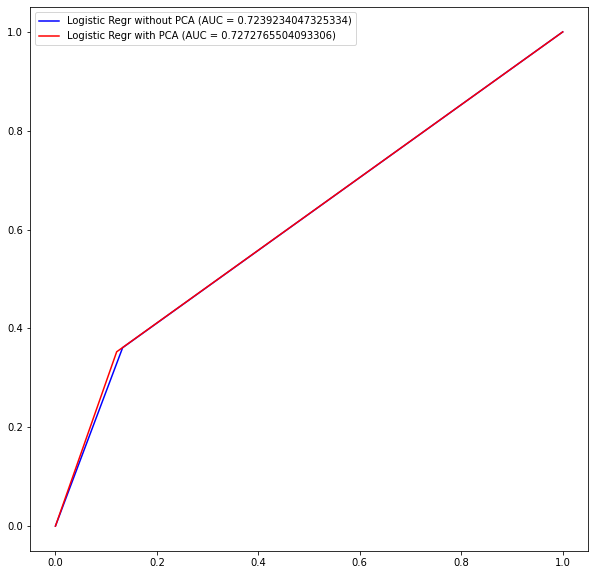

In [226]:
# Plotting ROC Curve

fpr_base, tpr_base, thresholds_base = roc_curve(y_test, y_pred)
fpr_pca, tpr_pca, thresholds_pca = roc_curve(y_test_pca, y_pred_pca)

plt.figure(figsize=[10, 10])

plt.plot(fpr_base, tpr_base, c='b')
plt.plot(fpr_pca, tpr_pca, c='r')
plt.legend([f'Logistic Regr without PCA (AUC = {auc_base})',
           f'Logistic Regr with PCA (AUC = {auc_pca})'])

plt.show()

In [227]:
#

## The ROC Curve also do not show much difference between base Logistic Regression Model and the one with PCA components.